In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [10]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## BMI has roughly 4% of values missing. Several options: mean/median imputation, remove null rows, K-nearest neighbours, model imputation (random forest/XGboost/linear regression). Come back to that later.

In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


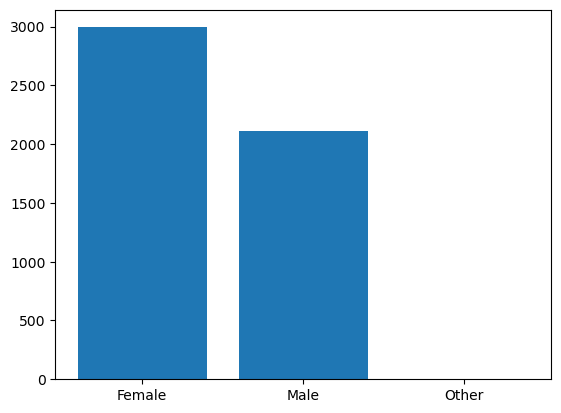

In [13]:
plt.bar(df['gender'].value_counts().index, df['gender'].value_counts().values)
plt.show()

In [14]:
pd.crosstab(df['gender'], df['stroke'])

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


In [15]:
pd.crosstab(df['gender'], df['stroke'],normalize='index')

stroke,0,1
gender,,
Female,0.952906,0.047094
Male,0.948936,0.051064
Other,1.000000,0.000000


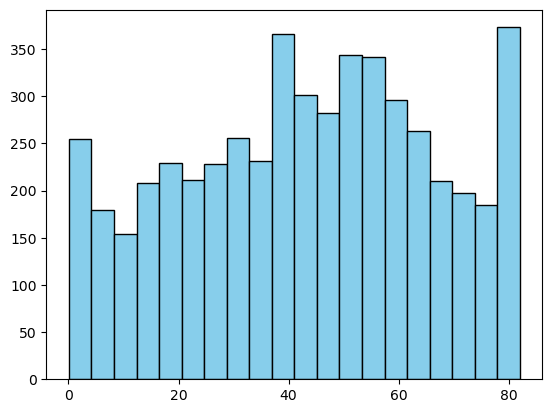

In [16]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.show()

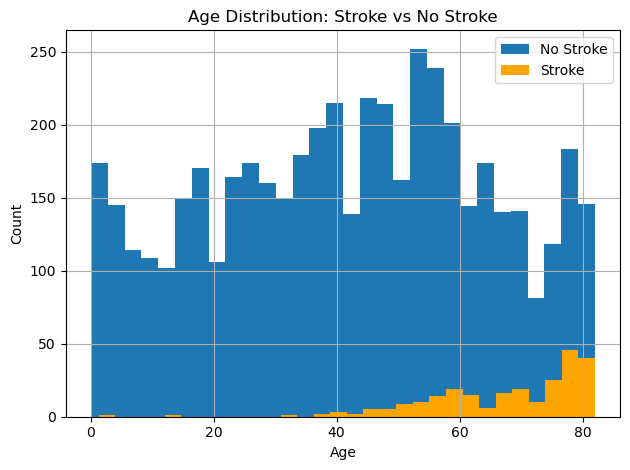

In [17]:
df[df['stroke'] == 0]['age'].hist(bins=30, label='No Stroke')
df[df['stroke'] == 1]['age'].hist(bins=30, label='Stroke', color='orange')
plt.title('Age Distribution: Stroke vs No Stroke')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

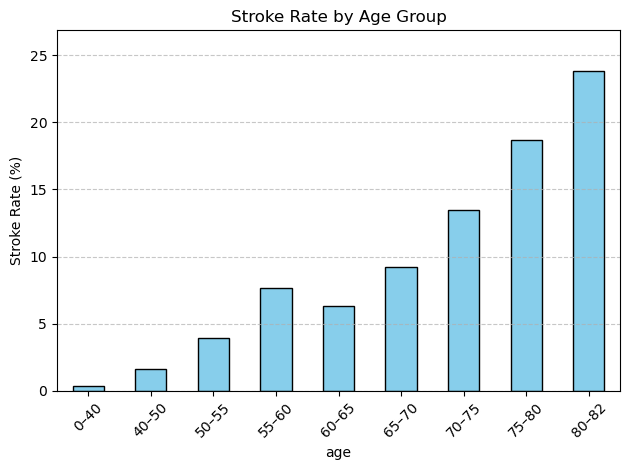

In [18]:
bins = [0, 40, 50, 55, 60, 65, 70, 75, 80, 82]
labels = ['0–40', '40–50', '50–55', '55–60', '60–65', '65–70', '70–75', '75–80', '80–82']

stroke_rate = df.groupby(pd.cut(df['age'], bins=bins, labels=labels, right=False), observed=True)['stroke'].mean() * 100

stroke_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Stroke Rate (%)')
plt.title('Stroke Rate by Age Group')
plt.xticks(rotation=45)
plt.ylim(0, stroke_rate.max() + 3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Plot above is left-inclusive and right-exclusive i.e. 60 <= age < 65

In [19]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [20]:
contingency = pd.crosstab(df['hypertension'], df['stroke'])
contingency

stroke,0,1
hypertension,,
0,4429,183
1,432,66


In [21]:
import scipy.stats as stats

chi2, p, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi-squared Statistic = {chi2}")
print(f"p-value = {p}")


Chi-squared Statistic = 81.6053682482931
p-value = 1.661621901511823e-19


In [22]:
a = contingency.loc[1, 1]
b = contingency.loc[1, 0]
c = contingency.loc[0, 1]
d = contingency.loc[0, 0]

oddsratio, p = stats.fisher_exact(contingency)

# Log OR and standard error
log_or = np.log(oddsratio)
se = np.sqrt(1/a + 1/b + 1/c + 1/d)

# 95% CI
ci_lower = np.exp(log_or - 1.96 * se)
ci_upper = np.exp(log_or + 1.96 * se)

print(f"Odds Ratio: {oddsratio:.3f}")
print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

Odds Ratio: 3.698
95% Confidence Interval: (2.744, 4.982)


In [23]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [24]:
contingency_hd = pd.crosstab(df['heart_disease'], df['stroke'])
contingency_hd

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


In [25]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_hd)

print(f"Chi-squared Statistic = {chi2}")
print(f"p-value = {p}")

Chi-squared Statistic = 90.25956125843324
p-value = 2.088784568522924e-21


In [26]:
a = contingency_hd.loc[1, 1]
b = contingency_hd.loc[1, 0]
c = contingency_hd.loc[0, 1]
d = contingency_hd.loc[0, 0]

oddsratio, p = stats.fisher_exact(contingency_hd)

# Log OR and standard error
log_or = np.log(oddsratio)
se = np.sqrt(1/a + 1/b + 1/c + 1/d)

# 95% CI
ci_lower = np.exp(log_or - 1.96 * se)
ci_upper = np.exp(log_or + 1.96 * se)

print(f"Odds Ratio: {oddsratio:.3f}")
print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

Odds Ratio: 4.706
95% Confidence Interval: (3.336, 6.639)


In [27]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [28]:
contingency_marriage = pd.crosstab(df['ever_married'], df['stroke'])
contingency_marriage

stroke,0,1
ever_married,,
No,1728,29
Yes,3133,220


In [29]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_marriage)

print(f"Chi-squared Statistic = {chi2}")
print(f"p-value = {p}")

Chi-squared Statistic = 58.923890259034195
p-value = 1.6389021142314745e-14


In [30]:
a = contingency_marriage.loc['Yes', 1]
b = contingency_marriage.loc['Yes', 0]
c = contingency_marriage.loc['No', 1]
d = contingency_marriage.loc['No', 0]

oddsratio, p = stats.fisher_exact(contingency_marriage)

# Log OR and standard error
log_or = np.log(oddsratio)
se = np.sqrt(1/a + 1/b + 1/c + 1/d)

# 95% CI
ci_lower = np.exp(log_or - 1.96 * se)
ci_upper = np.exp(log_or + 1.96 * se)

print(f"Odds Ratio: {oddsratio:.3f}")
print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

Odds Ratio: 4.184
95% Confidence Interval: (2.828, 6.190)


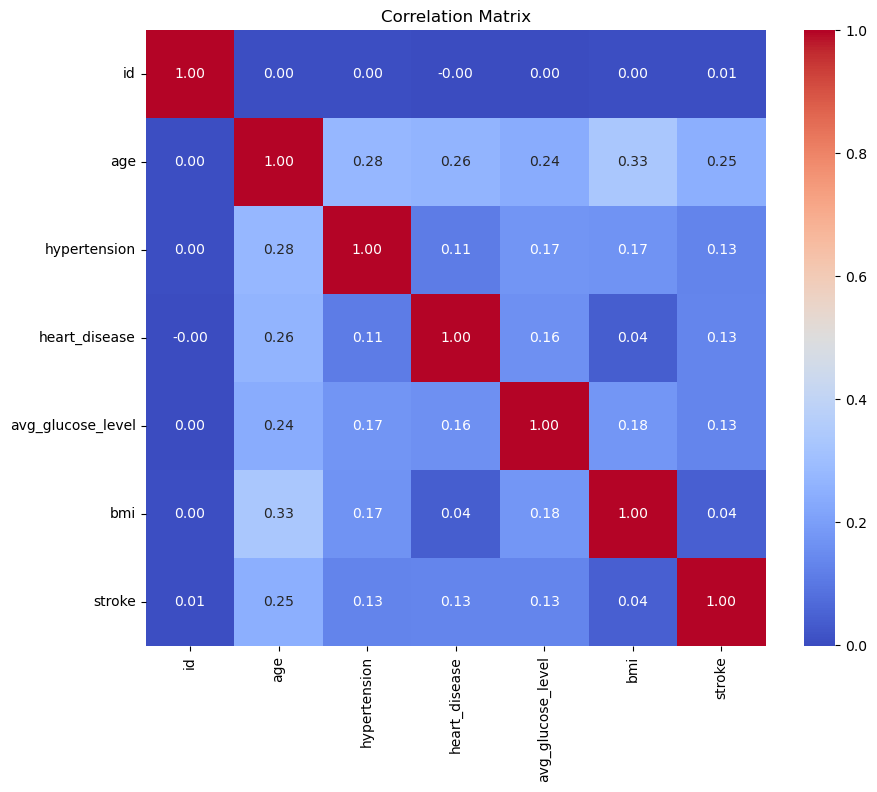

In [31]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [32]:
print(df['work_type'].value_counts())
pd.crosstab(df['work_type'], df['stroke'])

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


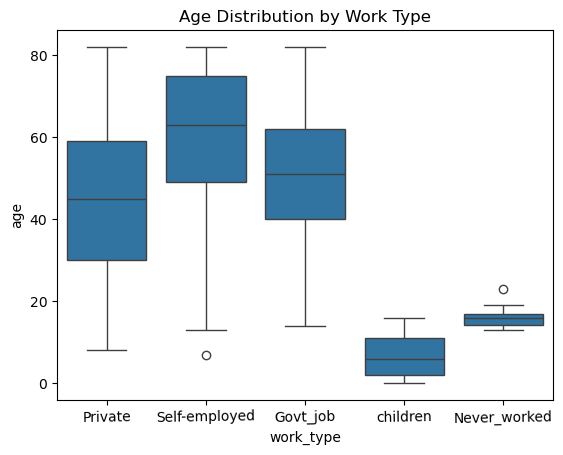

In [33]:
sns.boxplot(x='work_type', y='age', data=df)
plt.xticks(rotation=1) 
plt.title('Age Distribution by Work Type')
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np

# Numeric features
numeric_features = ['age']

# One-hot encode categorical variables
work_type_dummies = pd.get_dummies(df['work_type'], drop_first=True)

# Combine
X = pd.concat([df[numeric_features], work_type_dummies], axis=1)

X = X.dropna()

# Convert all columns to float
X = X.astype(float)

# Add constant
X = add_constant(X)

# Calculate VIF
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)


         feature        VIF
0          const  17.245989
1            age   1.869802
2   Never_worked   1.047912
3        Private   2.357131
4  Self-employed   1.929281
5       children   2.596055


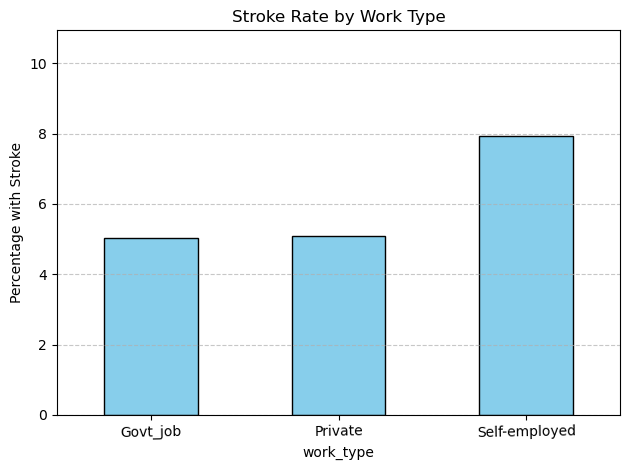

In [35]:
stroke_percentage = df.groupby('work_type')['stroke'].mean() * 100
stroke_percentage = stroke_percentage.drop(['children', 'Never_worked'], errors='ignore')
stroke_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Percentage with Stroke')
plt.title('Stroke Rate by Work Type')
plt.xticks(rotation=1)
plt.ylim(0, stroke_percentage.max() + 3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
contingency_job = pd.crosstab(
    df[df['work_type'].isin(['Self-employed', 'Private', 'Govt_job'])]['work_type'].apply(
        lambda x: 'Self-employed' if x == 'Self-employed' else 'Has employer'),
    df['stroke'])
contingency_job

stroke,0,1
work_type,,
Has employer,3400,182
Self-employed,754,65


In [37]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_job)
print(f"Chi-squared: {chi2:.3f}")
print(f"p-value: {p:.4f}")

Chi-squared: 9.729
p-value: 0.0018


In [38]:
a = contingency_job.loc['Self-employed', 1]
b = contingency_job.loc['Self-employed', 0]
c = contingency_job.loc['Has employer', 1]
d = contingency_job.loc['Has employer', 0]

oddsratio, p = stats.fisher_exact(contingency_job)

# Log OR and standard error
log_or = np.log(oddsratio)
se = np.sqrt(1/a + 1/b + 1/c + 1/d)

# 95% CI
ci_lower = np.exp(log_or - 1.96 * se)
ci_upper = np.exp(log_or + 1.96 * se)

print(f"Odds Ratio: {oddsratio:.3f}")
print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

Odds Ratio: 1.610
95% Confidence Interval: (1.200, 2.161)


In [39]:
pd.crosstab(df['Residence_type'], df['stroke'])

stroke,0,1
Residence_type,,
Rural,2400,114
Urban,2461,135


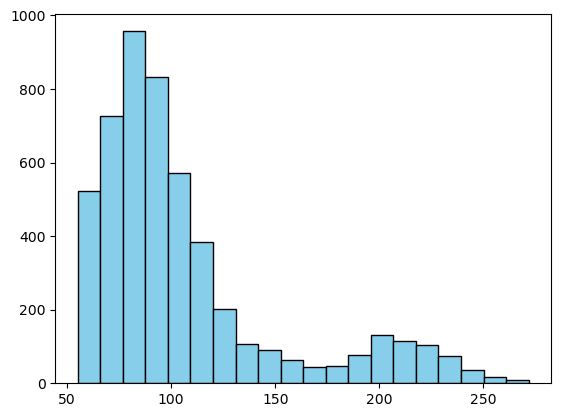

In [40]:
plt.hist(df['avg_glucose_level'], bins=20, color='skyblue', edgecolor='black')
plt.show()

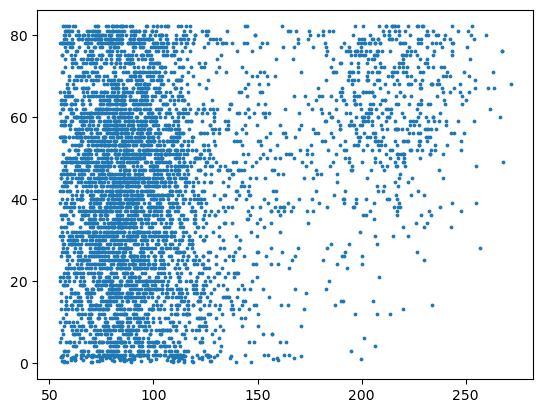

In [41]:
plt.scatter(df['avg_glucose_level'], df['age'], s=3)
plt.show()

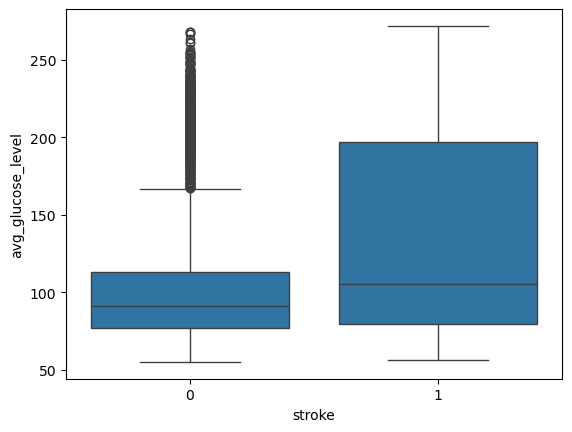

In [42]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.show()

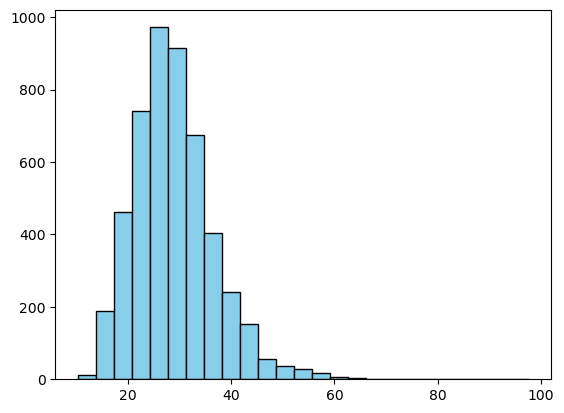

In [43]:
plt.hist(df['bmi'], bins=25, color='skyblue', edgecolor='black')
plt.show()

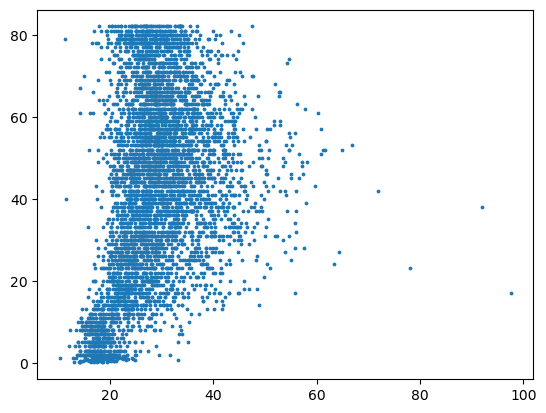

In [44]:
plt.scatter(df['bmi'], df['age'], s=3)
plt.show()

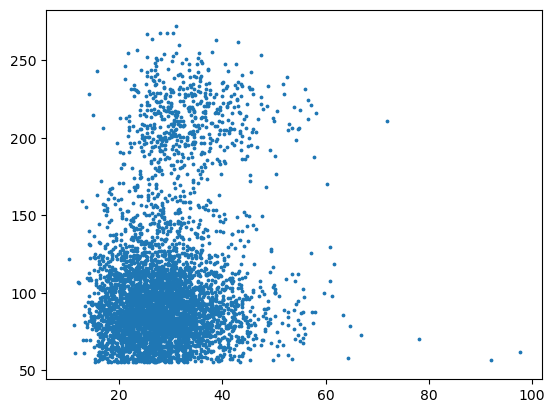

In [45]:
plt.scatter(df['bmi'], df['avg_glucose_level'], s=3)
plt.show()

In [46]:
group0 = df[df['stroke'] == 0]['bmi'].dropna()
group1 = df[df['stroke'] == 1]['bmi'].dropna()
mean_diff = group1.mean() - group0.mean()
pooled_std = np.sqrt((group0.std()**2 + group1.std()**2) / 2)
cohens_d = mean_diff / pooled_std
print(f"Cohen's d: {cohens_d:.3f}")

Cohen's d: 0.230


In [47]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [48]:
contingency_all = pd.crosstab(df['smoking_status'], df['stroke'])
contingency_all

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


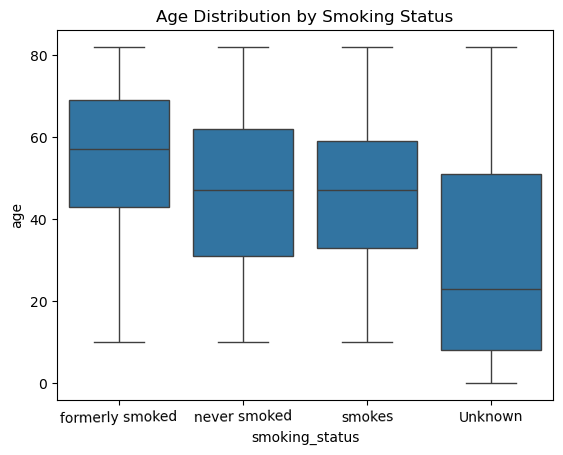

In [49]:
sns.boxplot(x='smoking_status', y='age', data=df)
plt.xticks(rotation=1) 
plt.title('Age Distribution by Smoking Status')
plt.show()

## Is age a confounding variable? Given that smokes and never-smoked have a similar stroke rate ~5%, and that the boxplot shows that former smokers are older, could the larger stroke rate in this group ~8% be caused by age knowing what we do from previous plots? Let's investigate.

In [50]:
chi2_all, p_all, dof_all, expected_all = stats.chi2_contingency(contingency_all)

print("Chi-squared test INCLUDING 'Unknown':")
print(f"Chi-squared: {chi2_all:.3f}")
print(f"p-value: {p_all:.4f}")
print(f"Degrees of Freedom: {dof_all}")
print()

Chi-squared test INCLUDING 'Unknown':
Chi-squared: 29.147
p-value: 0.0000
Degrees of Freedom: 3



In [51]:
contingency_no_unknown = pd.crosstab(df[df['smoking_status'] != 'Unknown']['smoking_status'],
                                     df[df['smoking_status'] != 'Unknown']['stroke'])
contingency_no_unknown

stroke,0,1
smoking_status,,
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


In [52]:
chi2_no, p_no, dof_no, expected_no = stats.chi2_contingency(contingency_no_unknown)

print("Chi-squared test EXCLUDING 'Unknown':")
print(f"Chi-squared: {chi2_no:.3f}")
print(f"p-value: {p_no:.4f}")
print(f"Degrees of Freedom: {dof_no}")

Chi-squared test EXCLUDING 'Unknown':
Chi-squared: 11.436
p-value: 0.0033
Degrees of Freedom: 2


In [53]:
import statsmodels.api as sm

# One-hot encode smoking_status
X = pd.get_dummies(df[['age', 'smoking_status']], drop_first=True)

# Ensure all columns are numeric
X = X.astype(float)

# Add a constant (intercept)
X = sm.add_constant(X)

# Define y
y = df['stroke'].astype(int)

# Fit logistic regression
model = sm.Logit(y, X).fit()

# Show summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.157832
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5105
Method:                           MLE   Df Model:                            4
Date:                Mon, 23 Jun 2025   Pseudo R-squ.:                  0.1896
Time:                        17:24:14   Log-Likelihood:                -806.52
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 2.195e-80
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.3044      0.366    -19.974     

In [54]:
pd.crosstab(df['hypertension'], df['heart_disease'])

heart_disease,0,1
hypertension,,
0,4400,212
1,434,64


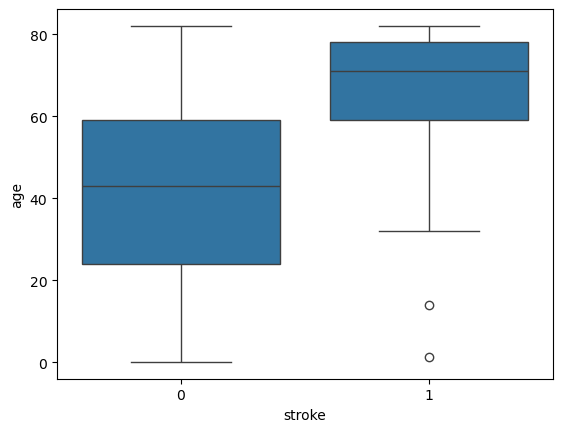

In [55]:
sns.boxplot(x='stroke', y='age', data=df)
plt.show()

In [56]:
from scipy.stats import mannwhitneyu

age_stroke = df[df['stroke'] == 1]['age']
age_no_stroke = df[df['stroke'] == 0]['age']

u_stat, p_value = mannwhitneyu(age_stroke, age_no_stroke, alternative='two-sided')

print(f"Mann–Whitney U statistic: {u_stat:.2f}")
print(f"p-value: {p_value:.5f}")

Mann–Whitney U statistic: 1010125.50
p-value: 0.00000


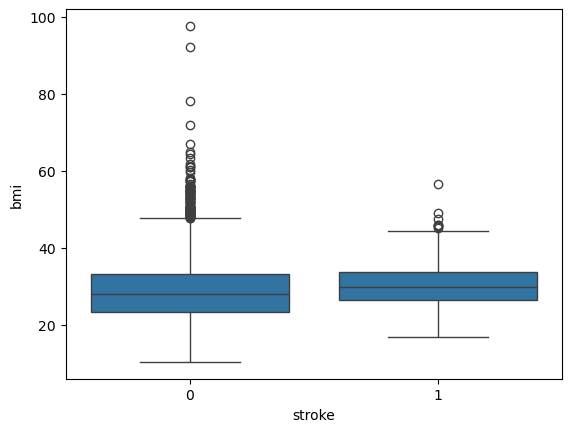

In [57]:
sns.boxplot(x='stroke', y='bmi', data=df)
plt.show()

In [58]:
bmi_stroke = df[df['stroke'] == 1]['bmi'].dropna()
bmi_no_stroke = df[df['stroke'] == 0]['bmi'].dropna()

t_stat, p_value = stats.ttest_ind(bmi_stroke, bmi_no_stroke, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 3.640
P-value: 0.0003


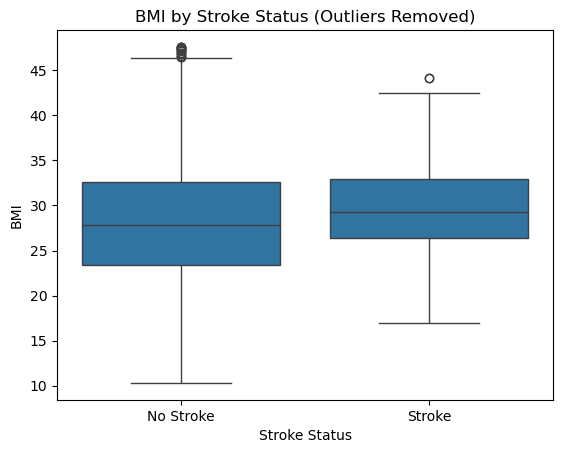

In [59]:
def remove_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series >= lower) & (series <= upper)]

group0 = df[df['stroke'] == 0]['bmi'].dropna()
group1 = df[df['stroke'] == 1]['bmi'].dropna()

group0_filtered = remove_outliers(group0)
group1_filtered = remove_outliers(group1)

df_filtered = pd.DataFrame({
    'bmi': pd.concat([group0_filtered, group1_filtered], ignore_index=True),
    'stroke': ['No Stroke'] * len(group0_filtered) + ['Stroke'] * len(group1_filtered)})

sns.boxplot(data=df_filtered, x='stroke', y='bmi')
plt.title('BMI by Stroke Status (Outliers Removed)')
plt.xlabel('Stroke Status')
plt.ylabel('BMI')
plt.show()


In [60]:
mean_diff = group1_filtered.mean() - group0_filtered.mean()
pooled_std = np.sqrt((group0_filtered.std()**2 + group1_filtered.std()**2) / 2)
cohens_d = mean_diff / pooled_std
print(f"Cohen's d: {cohens_d:.3f}")

Cohen's d: 0.251


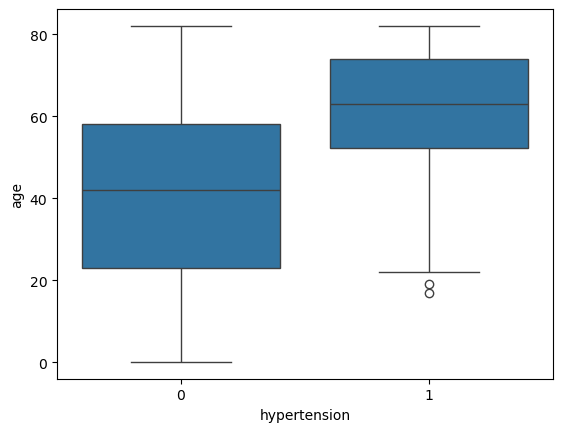

In [61]:
sns.boxplot(x='hypertension', y='age', data=df)
plt.show()

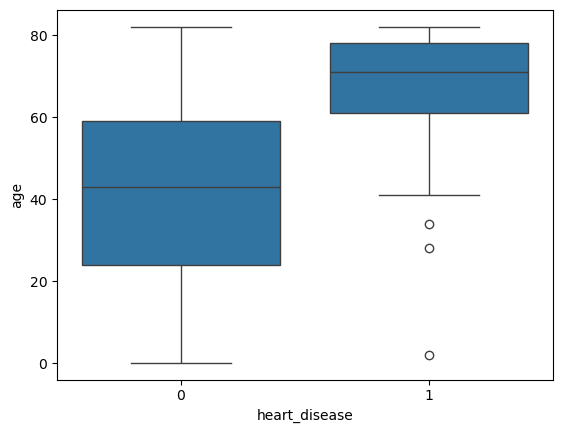

In [62]:
sns.boxplot(x='heart_disease', y='age', data=df)
plt.show()

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numeric predictors (before dummies for VIF)
X = df[['age', 'hypertension', 'heart_disease']]
X = add_constant(X)  # Adds the intercept term

# Create a DataFrame with VIF values
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

         feature       VIF
0          const  4.769698
1            age  1.151723
2   hypertension  1.084295
3  heart_disease  1.076362


## VIF scores show that what the boxplots show is correlation and not multicollinearity.

## Impute bmi (could use KNN). Also, consider feature engineering. Validate whether groupings are helpful with cross-validated performance. Use Pipeline.

## Feature engineer first in the pipeline, then preprocess data (scale, impute, encode), then classifier (LogR, RF, XGB).

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

In [65]:
df = df.copy()

df['gender'] = df['gender'].replace('Other', 'Female')

df['work_type_grouped'] = df['work_type'].replace({
    'Private': 'Has employer',
    'Govt_job': 'Has employer',
    'children': 'Kids/Never_worked',
    'Never_worked': 'Kids/Never_worked'})

df.drop(columns='work_type', inplace=True)

df.drop(columns='id', inplace=True)

In [66]:
X = df.drop(columns='stroke')
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13, stratify=y)

In [67]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'ever_married', 'work_type_grouped', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

# Define preprocessing for numerical data: KNN imputation + Scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical data: One-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#  Final Pipeline with Logistic Regression
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=13))])

# Train the model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.84      0.25        50

    accuracy                           0.75      1022
   macro avg       0.57      0.79      0.55      1022
weighted avg       0.95      0.75      0.82      1022



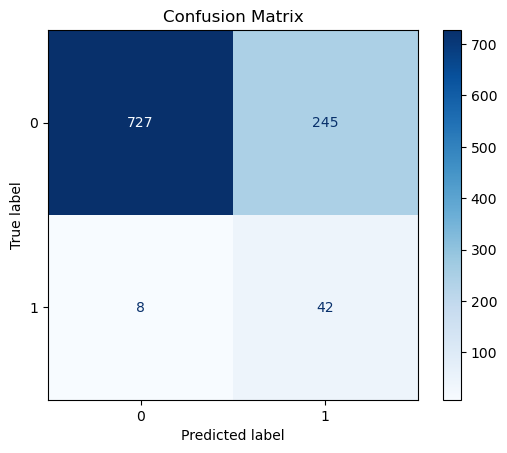

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

In [69]:
# Get one-hot encoded categorical feature names
ohe = clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_features = ohe.get_feature_names_out(categorical_features)

# Combine numeric and one-hot encoded categorical feature names
all_features = numeric_features + list(cat_features)

# Extract coefficients from the logistic regression model
coefs = clf.named_steps['classifier'].coef_[0]

# Build and sort the DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefs})

print(coef_df.to_string(index=False))

                            Feature  Coefficient
                                age     1.709921
                  avg_glucose_level     0.165849
                                bmi     0.107482
                        gender_Male    -0.159461
                   ever_married_Yes     0.011551
work_type_grouped_Kids/Never_worked     1.446542
    work_type_grouped_Self-employed    -0.180204
               Residence_type_Urban    -0.000236
     smoking_status_formerly smoked     0.267261
        smoking_status_never smoked    -0.076105
              smoking_status_smokes     0.424231
                     hypertension_1     0.513267
                    heart_disease_1     0.371623


In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_new = pd.concat([X_train, y_train], axis=1)

median_bmi = X_new['bmi'].median()
X_new['bmi'] = X_new['bmi'].fillna(median_bmi)


# Fit logistic regression
model = smf.logit(formula="""
    stroke ~ age + avg_glucose_level + bmi + C(gender) + C(ever_married) + C(work_type_grouped) + C(Residence_type) + C(smoking_status)
           + hypertension + heart_disease""", data=X_new).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.156525
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 4088
Model:                          Logit   Df Residuals:                     4074
Method:                           MLE   Df Model:                           13
Date:                Mon, 23 Jun 2025   Pseudo R-squ.:                  0.1957
Time:                        17:24:16   Log-Likelihood:                -639.88
converged:                       True   LL-Null:                       -795.55
Covariance Type:            nonrobust   LLR p-value:                 1.007e-58
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    

## Try oversampling techniques to improve the model. 

In [71]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN

models = {
    'Baseline': clf,
    'SMOTE': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=13)),
        ('classifier', LogisticRegression(max_iter=1000, random_state=13))
    ]),
    'ADASYN': ImbPipeline([
        ('preprocessor', preprocessor),
        ('adasyn', ADASYN(random_state=13)),
        ('classifier', LogisticRegression(max_iter=1000, random_state=13))
    ]),
    'RandomOverSampler': ImbPipeline([
        ('preprocessor', preprocessor),
        ('ros', RandomOverSampler(random_state=13)),
        ('classifier', LogisticRegression(max_iter=1000, random_state=13))
    ])
}



--- Baseline ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.84      0.25        50

    accuracy                           0.75      1022
   macro avg       0.57      0.79      0.55      1022
weighted avg       0.95      0.75      0.82      1022



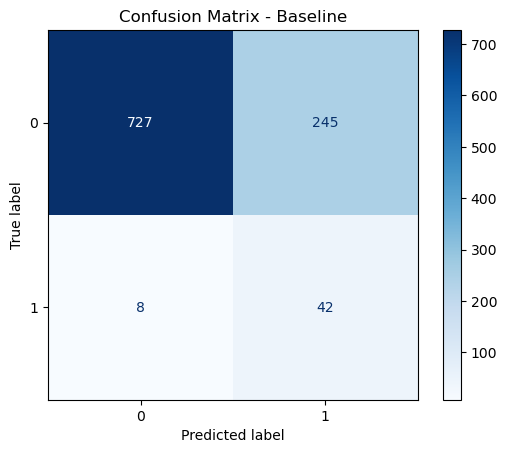


--- SMOTE ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.86      0.26        50

    accuracy                           0.76      1022
   macro avg       0.57      0.81      0.56      1022
weighted avg       0.95      0.76      0.83      1022



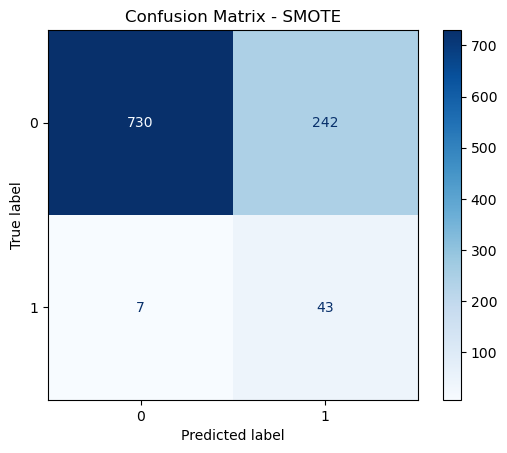


--- ADASYN ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.86      0.25        50

    accuracy                           0.74      1022
   macro avg       0.57      0.80      0.55      1022
weighted avg       0.95      0.74      0.82      1022



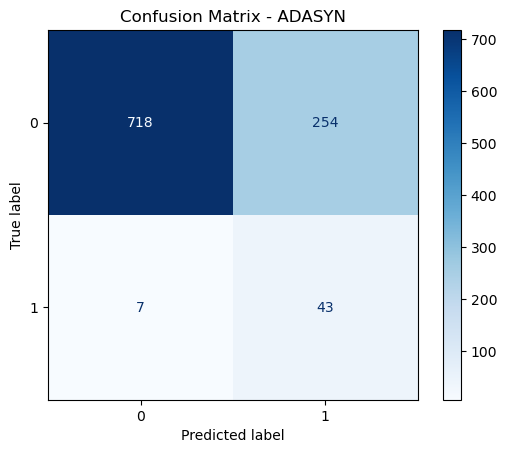


--- RandomOverSampler ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.84      0.25        50

    accuracy                           0.75      1022
   macro avg       0.57      0.79      0.55      1022
weighted avg       0.95      0.75      0.82      1022



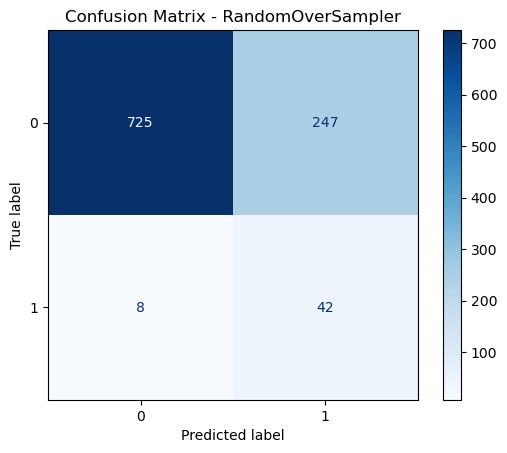

In [72]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--- {name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = model.classes_ if hasattr(model, 'classes_') else model.named_steps['classifier'].classes_

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


## That didn't seem to help much. Now let's look at undersampling.


--- RandomUnderSampler ---
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.88      0.26        50

    accuracy                           0.75      1022
   macro avg       0.57      0.81      0.56      1022
weighted avg       0.95      0.75      0.82      1022



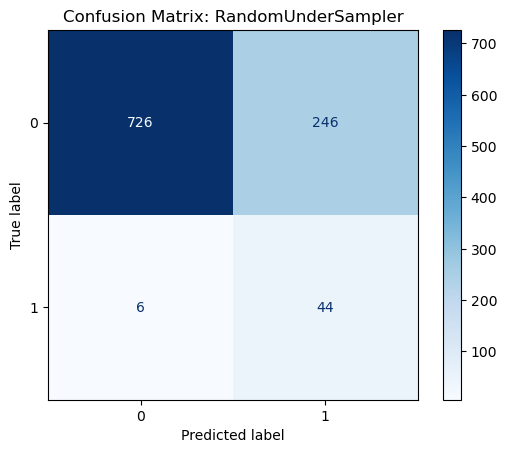


--- EditedNearestNeighbours ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.50      0.06      0.11        50

    accuracy                           0.95      1022
   macro avg       0.73      0.53      0.54      1022
weighted avg       0.93      0.95      0.93      1022



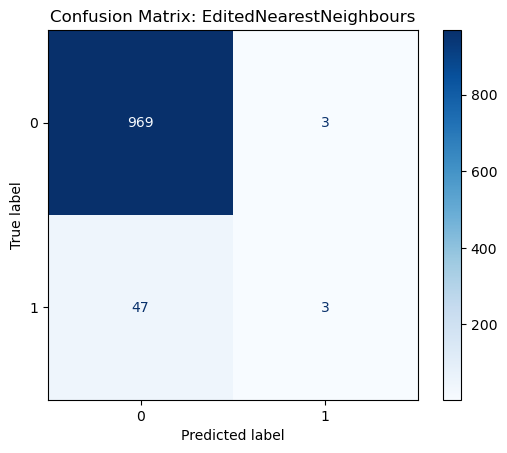

In [73]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours

undersampling_methods = {
    'RandomUnderSampler': RandomUnderSampler(random_state=13),
    'EditedNearestNeighbours': EditedNearestNeighbours()
}

# Dictionary to store trained models
undersampling_models = {}

# Loop through each undersampling method
for name, sampler in undersampling_methods.items():
    print(f"\n--- {name} ---")

    # Create pipeline
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersample', sampler),
        ('classifier', LogisticRegression(max_iter=1000, random_state=13))
    ])
    
    # Fit and predict
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Store trained pipeline
    undersampling_models[name] = pipeline
    
    # Print metrics
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()


## Let's look at cost-sensitive learning.

Classification Report with Custom Class Weights:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.84      0.25        50

    accuracy                           0.75      1022
   macro avg       0.57      0.79      0.55      1022
weighted avg       0.95      0.75      0.82      1022



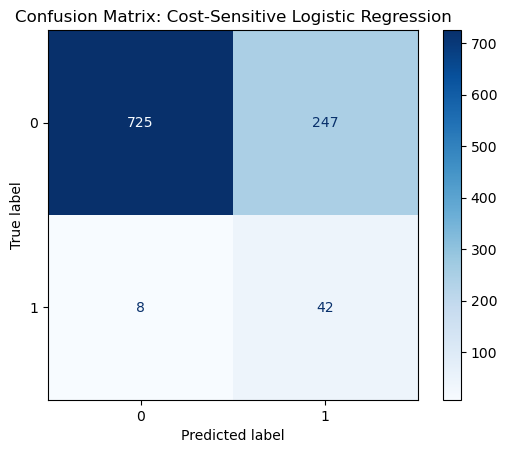

In [74]:
# Dictionary to store the cost-sensitive model
cost_sensitive_models = {}

# Define custom class weights
custom_weights = {0: 1, 1: 20}

# Create pipeline
cost_sensitive_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight=custom_weights, random_state=13))
])

# Fit and predict
cost_sensitive_pipeline.fit(X_train, y_train)
y_pred = cost_sensitive_pipeline.predict(X_test)

# Store the trained model
cost_sensitive_models['CostSensitive'] = cost_sensitive_pipeline

# Print evaluation metrics
print("Classification Report with Custom Class Weights:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cost_sensitive_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Cost-Sensitive Logistic Regression")
plt.show()


## Logistic regression on only the significant predictors does not improve the metrics either:

In [75]:
numeric_features = ['age', 'avg_glucose_level']
categorical_features = ['hypertension']  # no scaling

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('identity', 'passthrough')
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

#  Final Pipeline with Logistic Regression
signif = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=13))])

# Train the model
signif.fit(X_train, y_train)

# Predict and evaluate
y_pred = signif.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.15      0.84      0.25        50

    accuracy                           0.75      1022
   macro avg       0.57      0.79      0.55      1022
weighted avg       0.95      0.75      0.82      1022



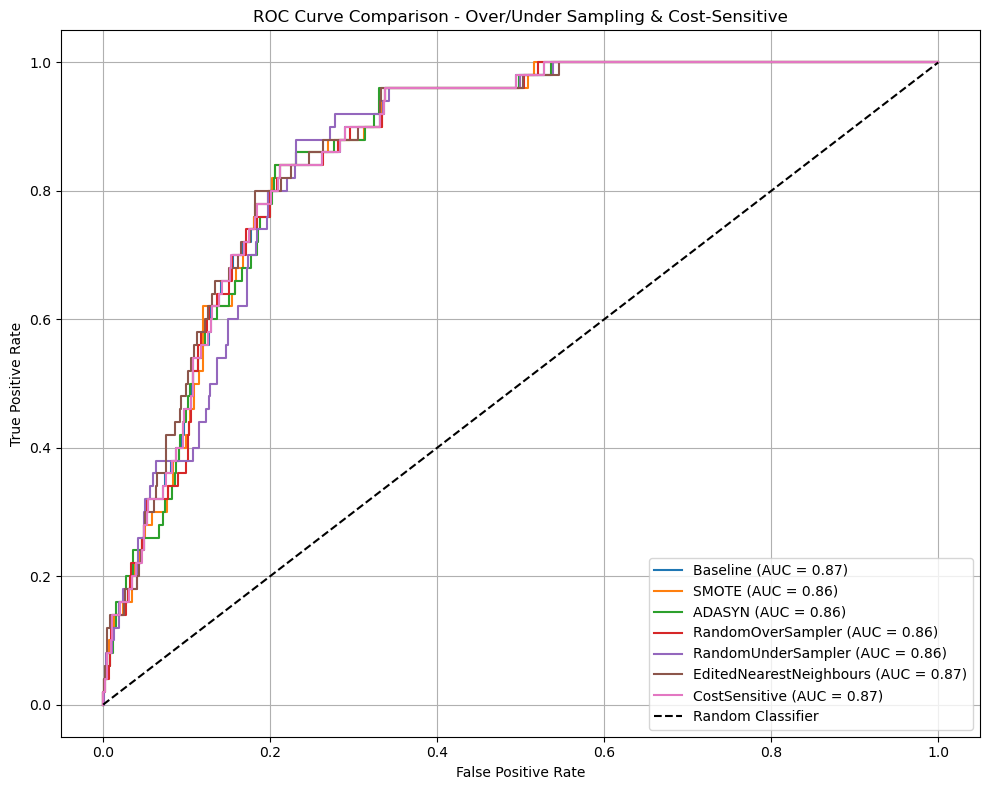

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

# Combine all models
all_models = {
    **models,    
    **undersampling_models,  
    **cost_sensitive_models    
}

plt.figure(figsize=(10, 8))

# Plot ROC for each model
for name, model in all_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title("ROC Curve Comparison - Over/Under Sampling & Cost-Sensitive")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## ROC/AUC is not really a useful metric when dealing with heavily-imbalanced data as the FPR does not change much. Using Precision-Recall AUC is a better alternative, which we will use later on.

## Moving onto RandomForest to see if we can get better results.

In [77]:
from sklearn.ensemble import RandomForestClassifier

numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'ever_married', 'work_type_grouped', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Final pipeline with random forest classifier
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced',random_state=13, n_jobs=-1))
])

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.33      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022



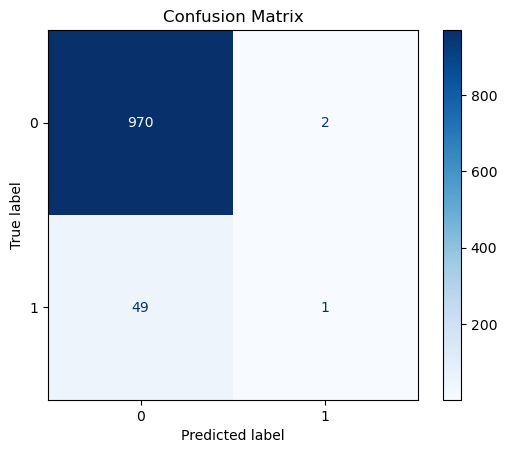

In [78]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


=== Baseline ===
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.17      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.56      0.51      0.50      1022
weighted avg       0.91      0.95      0.93      1022



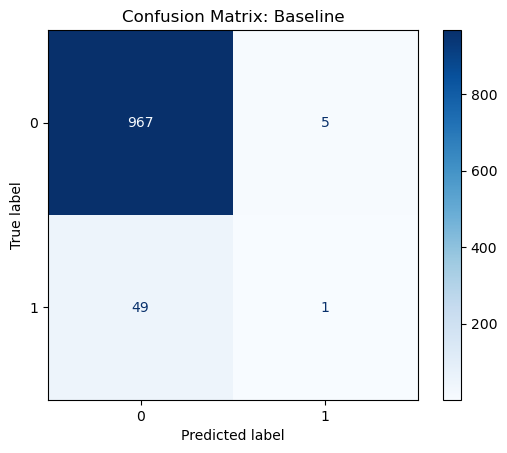


=== SMOTE ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.15      0.14      0.14        50

    accuracy                           0.92      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.92      0.92      0.92      1022



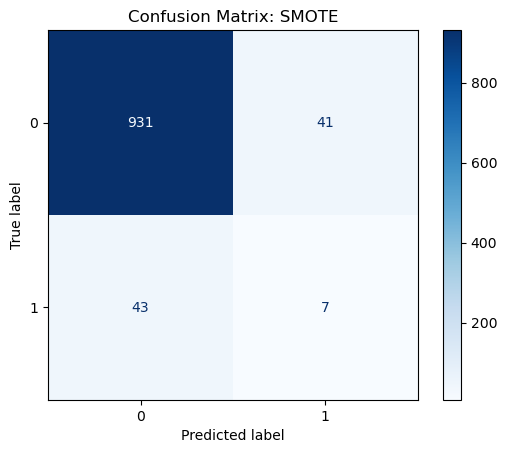


=== ADASYN ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.15      0.14      0.14        50

    accuracy                           0.92      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.92      0.92      0.92      1022



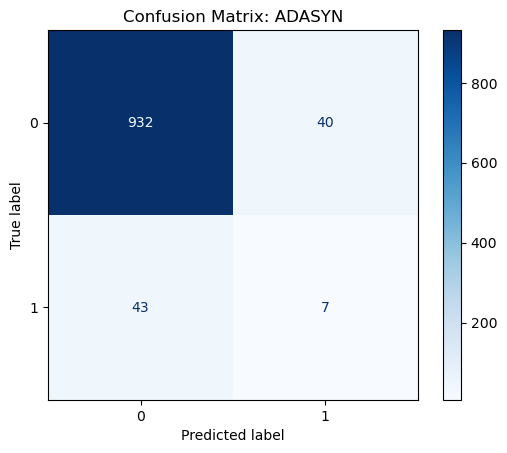


=== RandomOverSampler ===
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.31      0.08      0.13        50

    accuracy                           0.95      1022
   macro avg       0.63      0.54      0.55      1022
weighted avg       0.92      0.95      0.93      1022



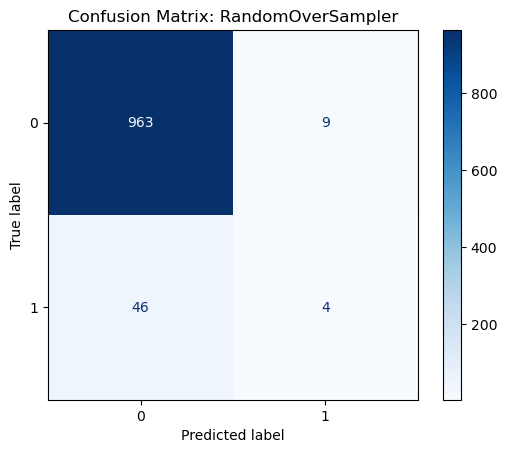


=== RandomUnderSampler ===
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.15      0.86      0.25        50

    accuracy                           0.75      1022
   macro avg       0.57      0.80      0.55      1022
weighted avg       0.95      0.75      0.82      1022



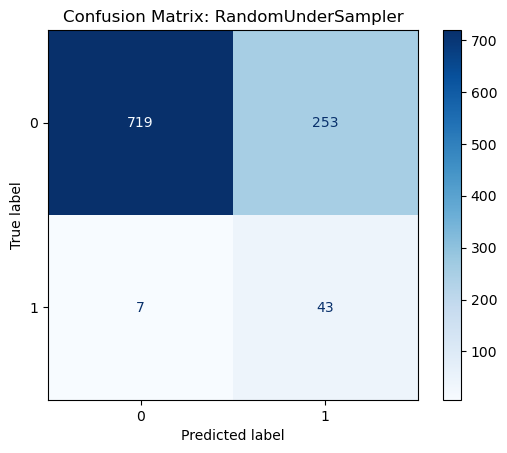


=== EditedNearestNeighbours ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.26      0.10      0.14        50

    accuracy                           0.94      1022
   macro avg       0.61      0.54      0.56      1022
weighted avg       0.92      0.94      0.93      1022



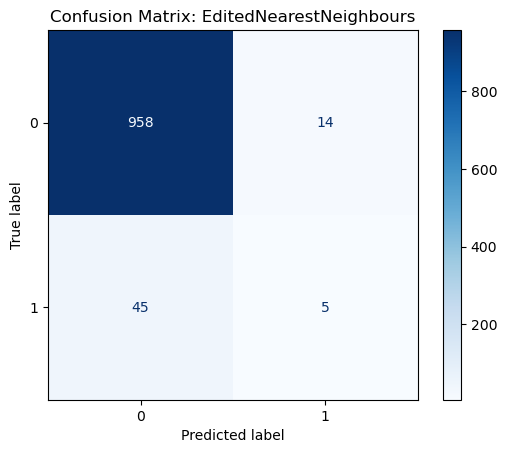


=== Cost-Sensitive ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.50      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.73      0.51      0.51      1022
weighted avg       0.93      0.95      0.93      1022



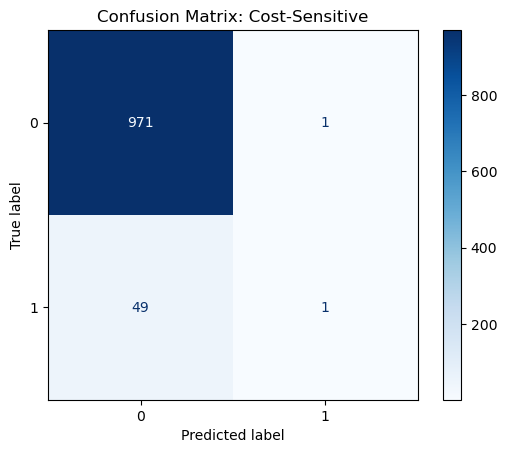

In [79]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'ever_married', 'work_type_grouped', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']


numeric_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Random Forest base classifier
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)

# Define pipelines for each sampling method + Random Forest
models = {
    'Baseline': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=13, n_jobs=-1))
    ]),
    'SMOTE': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=13)),
        ('classifier', RandomForestClassifier(random_state=13, n_jobs=-1))
    ]),
    'ADASYN': ImbPipeline([
        ('preprocessor', preprocessor),
        ('adasyn', ADASYN(random_state=13)),
        ('classifier', RandomForestClassifier(random_state=13, n_jobs=-1))
    ]),
    'RandomOverSampler': ImbPipeline([
        ('preprocessor', preprocessor),
        ('ros', RandomOverSampler(random_state=13)),
        ('classifier', RandomForestClassifier(random_state=13, n_jobs=-1))
    ]),
    'RandomUnderSampler': ImbPipeline([
        ('preprocessor', preprocessor),
        ('rus', RandomUnderSampler(random_state=13)),
        ('classifier', RandomForestClassifier(random_state=13, n_jobs=-1))
    ]),
    'EditedNearestNeighbours': ImbPipeline([
        ('preprocessor', preprocessor),
        ('enn', EditedNearestNeighbours()),
        ('classifier', RandomForestClassifier(random_state=13, n_jobs=-1))
    ]),
    'Cost-Sensitive': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(class_weight={0:1,1:12}, random_state=13, n_jobs=-1))
    ])
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.named_steps['classifier'].classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

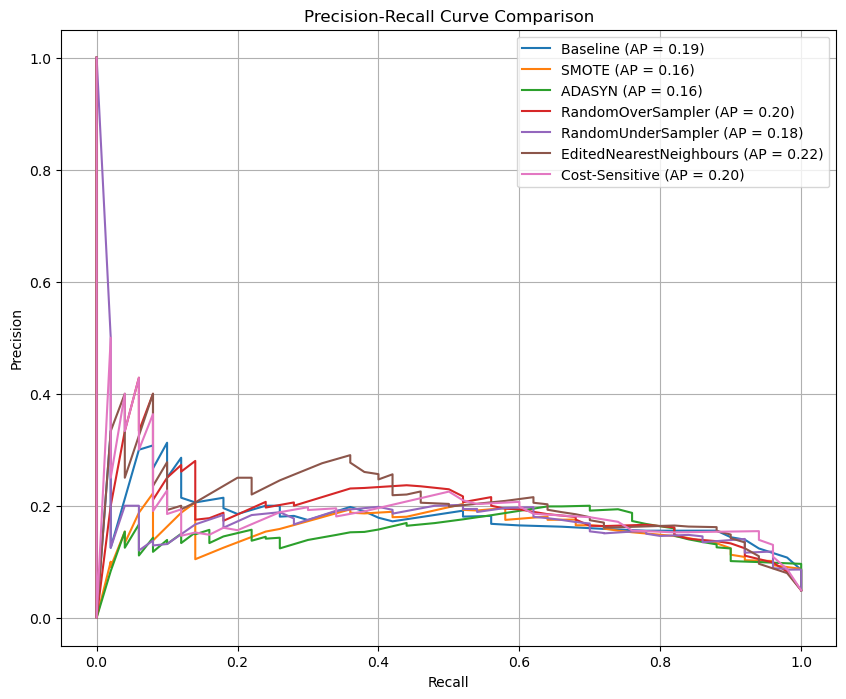

In [80]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if not hasattr(model.named_steps['classifier'], "classes_"):
        model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    
    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## These precision-recall curves show that our models require improvement, as the area under the curves is small.

## In a medical situation, it is far better to predict a stroke when there is none than to miss a stroke when there is one. Hence, recall is more important than precision in our case if we can only focus on boosting one metric. Of course, in an ideal world we would be able to improve both.

## Let's try setting custom thresholds for detecting strokes to see if we can improve our models.


=== Baseline ===
              precision    recall  f1-score   support

           0       0.99      0.72      0.84       972
           1       0.14      0.90      0.25        50

    accuracy                           0.73      1022
   macro avg       0.57      0.81      0.54      1022
weighted avg       0.95      0.73      0.81      1022



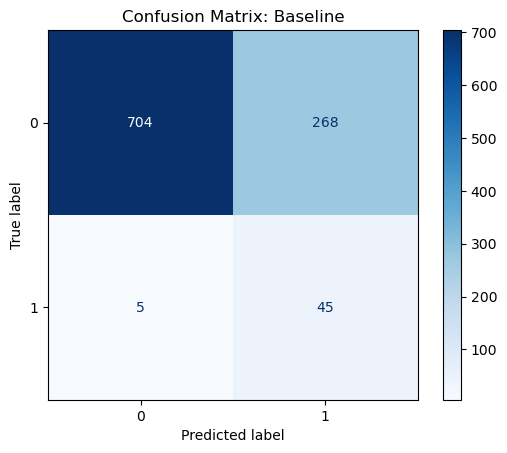


=== SMOTE ===
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       972
           1       0.10      0.92      0.18        50

    accuracy                           0.60      1022
   macro avg       0.55      0.75      0.46      1022
weighted avg       0.95      0.60      0.71      1022



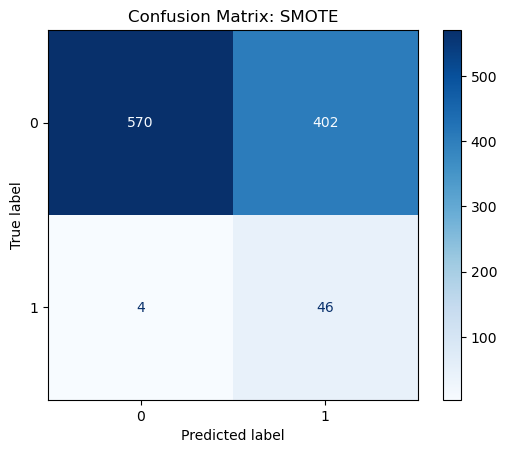


=== ADASYN ===
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       972
           1       0.10      0.90      0.18        50

    accuracy                           0.60      1022
   macro avg       0.55      0.74      0.46      1022
weighted avg       0.95      0.60      0.71      1022



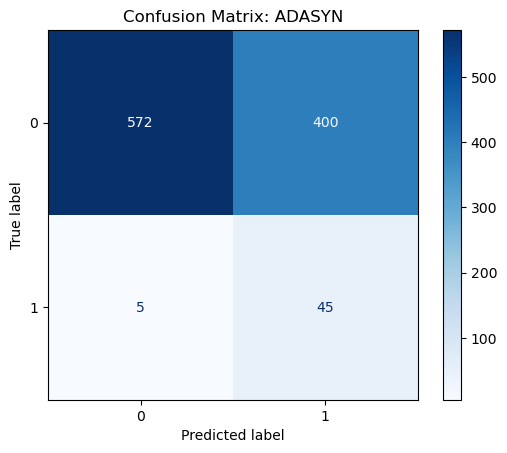


=== RandomOverSampler ===
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       972
           1       0.13      0.90      0.23        50

    accuracy                           0.71      1022
   macro avg       0.56      0.80      0.53      1022
weighted avg       0.95      0.71      0.79      1022



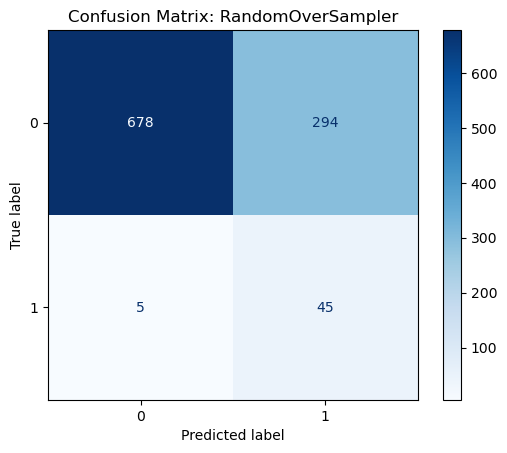


=== RandomUnderSampler ===
              precision    recall  f1-score   support

           0       1.00      0.17      0.28       972
           1       0.06      1.00      0.11        50

    accuracy                           0.21      1022
   macro avg       0.53      0.58      0.20      1022
weighted avg       0.95      0.21      0.28      1022



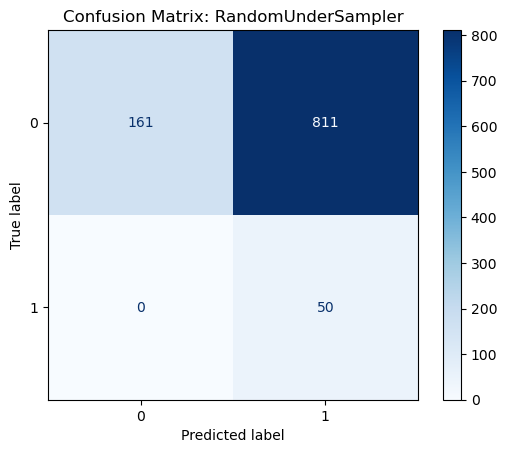


=== EditedNearestNeighbours ===
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       972
           1       0.13      0.92      0.23        50

    accuracy                           0.71      1022
   macro avg       0.56      0.81      0.53      1022
weighted avg       0.95      0.71      0.79      1022



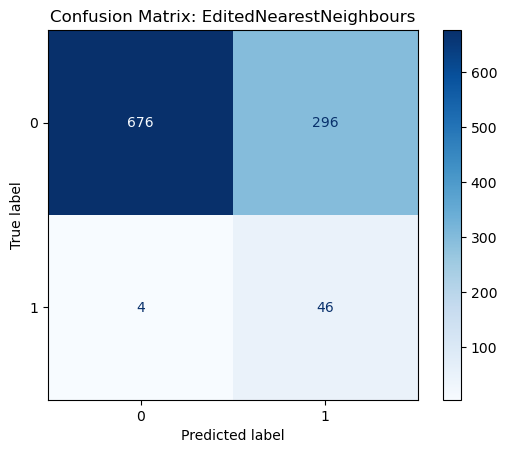


=== Cost-Sensitive ===
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       972
           1       0.15      0.94      0.27        50

    accuracy                           0.75      1022
   macro avg       0.58      0.84      0.56      1022
weighted avg       0.95      0.75      0.82      1022



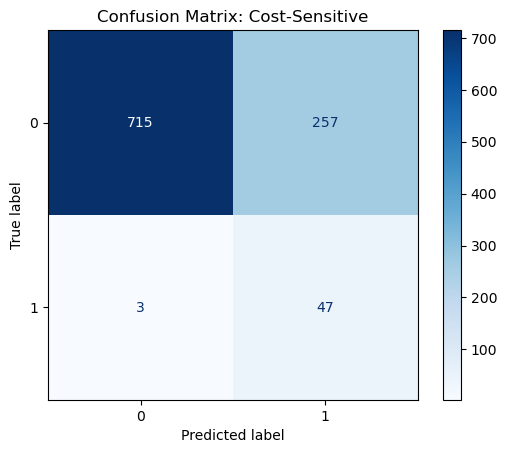

In [81]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Apply custom threshold
    y_pred = (y_proba >= 0.05).astype(int)
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()


## Looking at all of the models we have so far, the cost-sensitive learning random forest classifier with a custom decision threshold of 0.05 and class weights of 0:1, 1:12 is the most favourable model due to its high recall and low number of false negatives. The number of false positives is also comparable to that of other models.

## Let's look at XGBoost now.

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.27      0.06      0.10        50

    accuracy                           0.95      1022
   macro avg       0.61      0.53      0.54      1022
weighted avg       0.92      0.95      0.93      1022



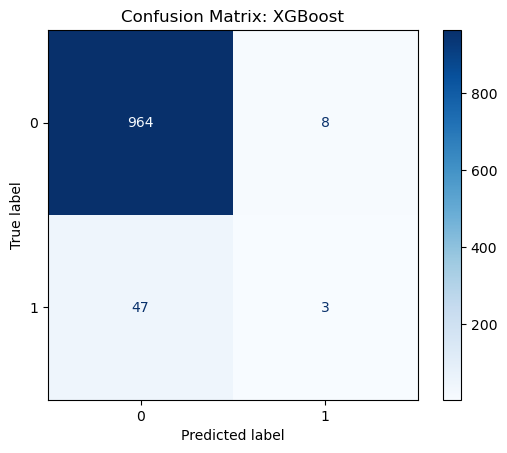

In [82]:
import xgboost as xgb
from xgboost import XGBClassifier

numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'ever_married', 'work_type_grouped', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Final pipeline with XGBoost classifier
xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=13))
])

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix: XGBoost')
plt.show()


=== Baseline ===
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.27      0.06      0.10        50

    accuracy                           0.95      1022
   macro avg       0.61      0.53      0.54      1022
weighted avg       0.92      0.95      0.93      1022



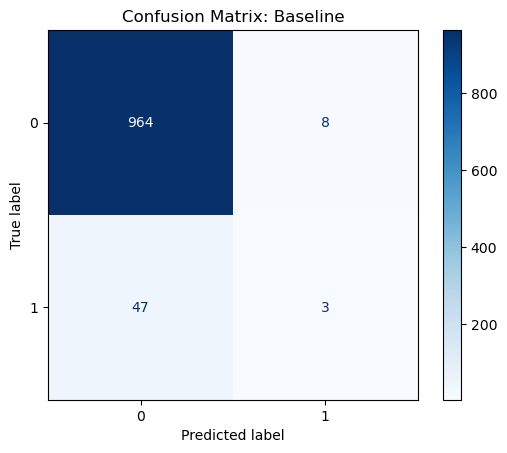


=== SMOTE ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.19      0.18      0.19        50

    accuracy                           0.92      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.92      0.92      0.92      1022



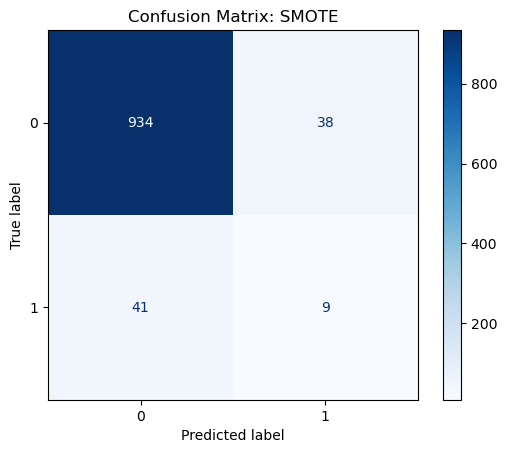


=== ADASYN ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.18      0.18      0.18        50

    accuracy                           0.92      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.92      0.92      0.92      1022



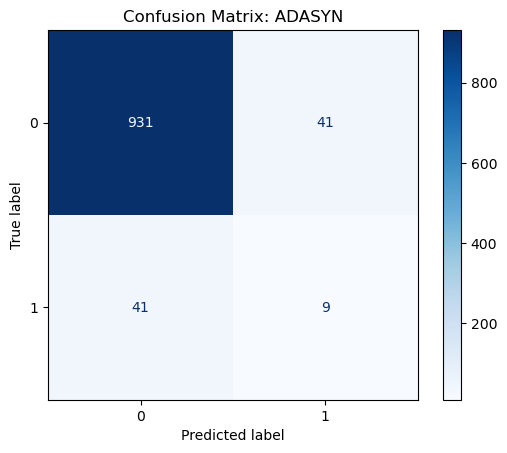


=== RandomOverSampler ===
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       972
           1       0.13      0.08      0.10        50

    accuracy                           0.93      1022
   macro avg       0.54      0.53      0.53      1022
weighted avg       0.91      0.93      0.92      1022



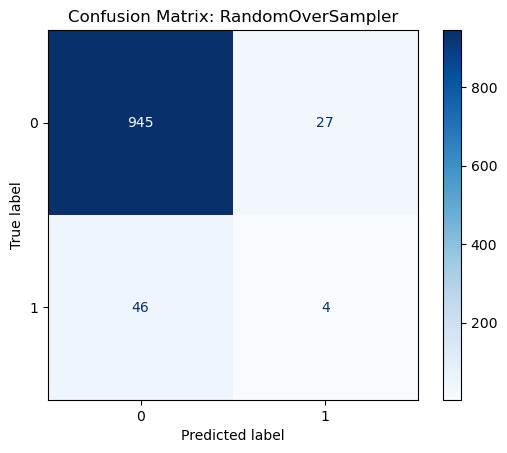


=== RandomUnderSampler ===
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       972
           1       0.13      0.82      0.23        50

    accuracy                           0.73      1022
   macro avg       0.56      0.77      0.53      1022
weighted avg       0.95      0.73      0.80      1022



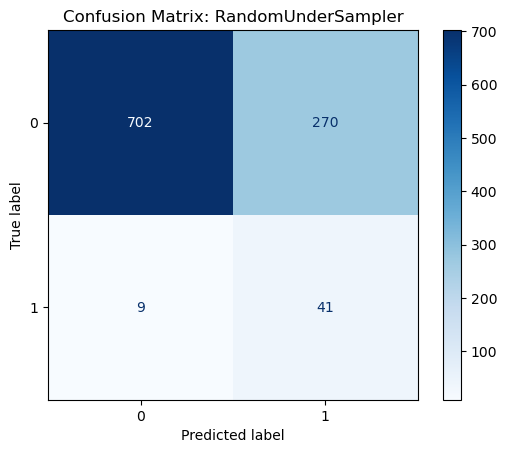


=== EditedNearestNeighbours ===
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       972
           1       0.28      0.20      0.23        50

    accuracy                           0.94      1022
   macro avg       0.62      0.59      0.60      1022
weighted avg       0.93      0.94      0.93      1022



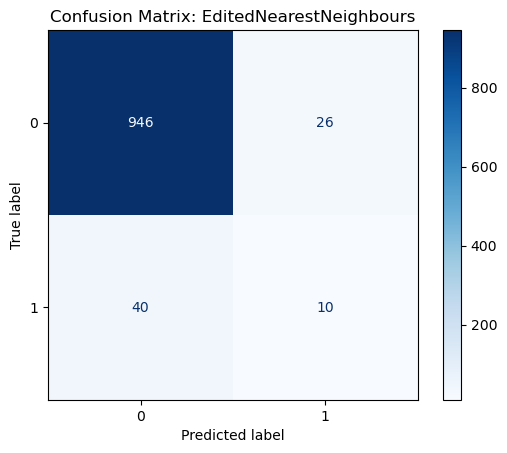


=== Cost-Sensitive ===
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.17      0.12      0.14        50

    accuracy                           0.93      1022
   macro avg       0.56      0.54      0.55      1022
weighted avg       0.92      0.93      0.92      1022



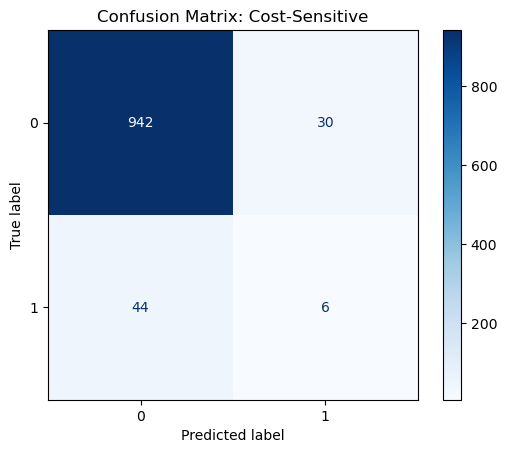

In [83]:
models = {
    'Baseline': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(random_state=13))
    ]),
    'SMOTE': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=13)),
        ('classifier', XGBClassifier(random_state=13))
    ]),
    'ADASYN': ImbPipeline([
        ('preprocessor', preprocessor),
        ('adasyn', ADASYN(random_state=13)),
        ('classifier', XGBClassifier(random_state=13))
    ]),
    'RandomOverSampler': ImbPipeline([
        ('preprocessor', preprocessor),
        ('ros', RandomOverSampler(random_state=13)),
        ('classifier', XGBClassifier(random_state=13))
    ]),
    'RandomUnderSampler': ImbPipeline([
        ('preprocessor', preprocessor),
        ('rus', RandomUnderSampler(random_state=13)),
        ('classifier', XGBClassifier(random_state=13))
    ]),
    'EditedNearestNeighbours': ImbPipeline([
        ('preprocessor', preprocessor),
        ('enn', EditedNearestNeighbours()),
        ('classifier', XGBClassifier(random_state=13))
    ]),
    'Cost-Sensitive': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(scale_pos_weight=20 , random_state=13))
    ])
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.named_steps['classifier'].classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

## None of these models are an improvement on our current best. Let's try some hyperparameter tuning.

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       972
           1       0.16      0.94      0.27        50

    accuracy                           0.75      1022
   macro avg       0.58      0.84      0.56      1022
weighted avg       0.95      0.75      0.82      1022



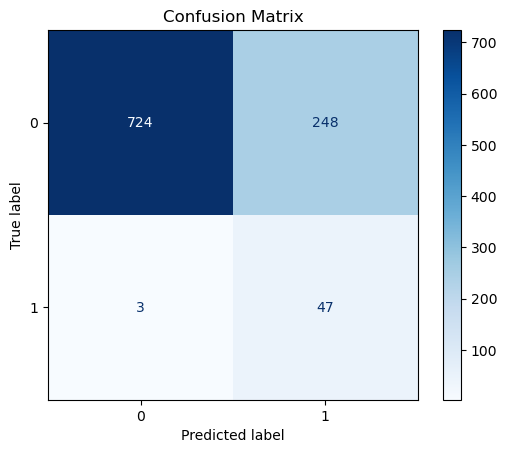

In [105]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_distributions = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__scale_pos_weight': [1, 5, 10]
}

# Custom scoring function for recall
recall_scorer = make_scorer(recall_score, pos_label=1)

random_search = RandomizedSearchCV(
    xgb_clf, param_distributions, n_iter=10, scoring=recall_scorer, n_jobs=-1, cv=5, random_state=13
)

random_search.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = random_search.best_estimator_.predict_proba(X_test)[:, 1]

# Adjust the threshold for higher recall
threshold = 0.3 # Experiment with this value
y_pred = (y_pred_proba >= threshold).astype(int)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## This model slightly improves upon our previous favourite as it decreases the number of false positives while keeping the same recall.

## Let's use a simple neural network to see if that can perform any better.

Epoch 1/20


C:\Users\the3s\AnacondaInstall\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6753 - loss: 0.5916
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7825 - loss: 0.4722
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7936 - loss: 0.4519
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7959 - loss: 0.4378
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8070 - loss: 0.4221
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8111 - loss: 0.4127  
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8178 - loss: 0.4030
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8247 - loss: 0.3908
Epoch 9/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8257 - loss: 0.3847
Epoch 10/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8361 - loss: 0.3744
Epoch 11/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8327 - loss: 0.3707
Epoch 12/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

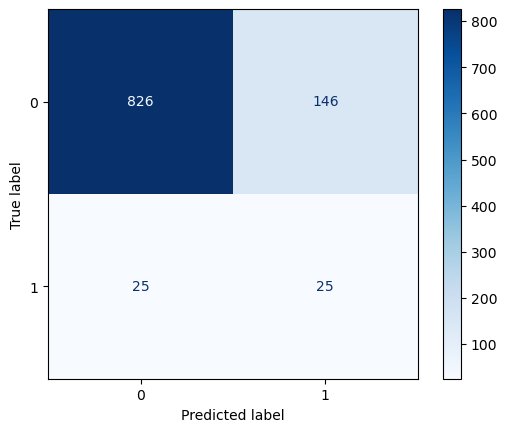

In [99]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'ever_married', 'work_type_grouped', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

numeric_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define input_dim for the NN after preprocessing:
X_train_transformed = preprocessor.fit_transform(X_train)
input_dim = X_train_transformed.shape[1]

# Define Keras model builder function
def create_nn_model():
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model with scikeras
keras_clf = KerasClassifier(model=create_nn_model, epochs=20, batch_size=32, verbose=1, random_state=13)

nn_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=13)),
    ('classifier', keras_clf)
])

nn_pipeline.fit(X_train, y_train)

y_pred = nn_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Several models, including logistic regression, random forest, and XGBoost, performed similarly regardless of whether oversampling or undersampling techniques were applied. Among these, the best-performing model was an XGBoost classifier tuned via randomised hyperparameter search. This model was optimised using a custom recall-based scoring function and employed a lower classification threshold of 0.3 to enhance recall for stroke classification. Adjusting the decision threshold enabled better sensitivity in identifying positive cases, which is crucial in this context.

## Further work should aim to reduce the false positive rate while maintaining a very low false negative rate, as demonstrated by the models in this study.